In [1]:
%load_ext autoreload
%autoreload 2

import torch
import torch.optim as optim
from torch.nn.functional import binary_cross_entropy_with_logits 
from torch.utils.data import DataLoader
import torchvision
import numpy as np
import matplotlib.pyplot as plt

from Networks import Discriminator,SythesisNetwork,DCStyleGenerator
from data_handler import CelebaDataset
from Trainer import Trainer


In [2]:
batch_size = 128
n_epochs = 150
latent_dim = 512

In [3]:
dataset = CelebaDataset()
print(len(dataset))
loader = DataLoader(dataset,batch_size = batch_size,shuffle = True )

60667


torch.Size([3, 64, 64])


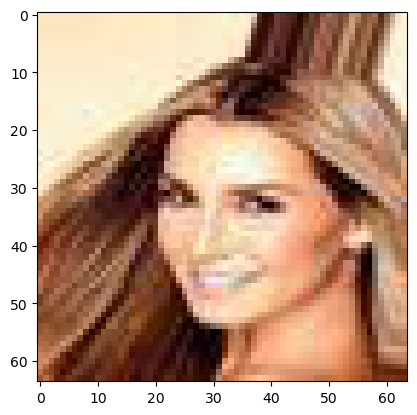

In [4]:
img = dataset[0]
print(img.shape)
img = dataset.un_normalize(img)

plt.imshow(img.permute(1,2,0).detach().numpy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


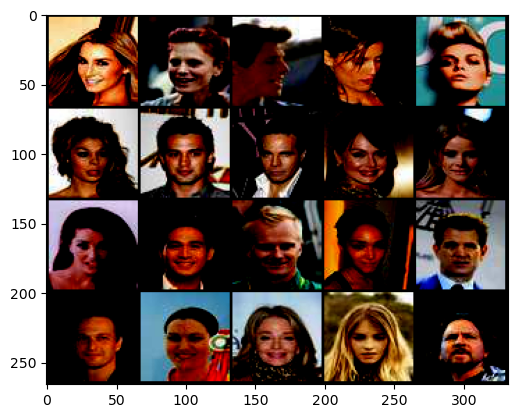

In [5]:
imgs = dataset[:20]
imgs = [im for im in imgs ]
imgs = torchvision.utils.make_grid(imgs,nrow = 5).permute(1,2,0)
plt.imshow(imgs)

In [6]:
generator = SythesisNetwork(latent_dim=latent_dim,use_batchNorm=False)
#generator = DCStyleGenerator(latent_size=latent_dim)

generator.to("cuda")

/home/mirksonius/Desktop/Duboko Učenje 2/miniSTLYE/NetBlocks.py:58: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(self.base, mode='fan_out', nonlinearity='relu')


SythesisNetwork(
  (mapping_network): MappingNetwork(
    (activation): LeakyReLU(negative_slope=0.01, inplace=True)
    (network): Sequential(
      (0): Linear(in_features=512, out_features=512, bias=True)
      (1): LeakyReLU(negative_slope=0.01, inplace=True)
      (2): Linear(in_features=512, out_features=512, bias=True)
      (3): LeakyReLU(negative_slope=0.01, inplace=True)
      (4): Linear(in_features=512, out_features=512, bias=True)
      (5): LeakyReLU(negative_slope=0.01, inplace=True)
      (6): Linear(in_features=512, out_features=512, bias=True)
      (7): LeakyReLU(negative_slope=0.01, inplace=True)
      (8): Linear(in_features=512, out_features=512, bias=True)
      (9): LeakyReLU(negative_slope=0.01, inplace=True)
      (10): Linear(in_features=512, out_features=512, bias=True)
      (11): LeakyReLU(negative_slope=0.01, inplace=True)
      (12): Linear(in_features=512, out_features=512, bias=True)
      (13): LeakyReLU(negative_slope=0.01, inplace=True)
      (14): 

In [7]:
discriminator = Discriminator()
discriminator.to("cuda")

Discriminator(
  (lrelu): LeakyReLU(negative_slope=0.2, inplace=True)
  (layer1): convBlock(
    (conv): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (bnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (activation): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (layer2): convBlock(
    (conv): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (bnorm): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (activation): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (layer3): convBlock(
    (conv): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (bnorm): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (activation): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (layer4): convBlock(
    (conv): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=Fa

In [8]:
generator_optim = optim.Adam(
    generator.parameters(),
    lr = 1e-4,betas = (0.0,0.99)
)
#discriminator_optim = optim.SGD(
#    discriminator.parameters(),
#    lr =1e-4)
discriminator_optim =optim.Adam(
    discriminator.parameters(),
    lr = 1e-4,betas = (0.0,0.99)
)

In [9]:
trainer = Trainer(
    generator = generator,
    discriminator = discriminator,
    gOptim = generator_optim,
    dOptim = discriminator_optim,
    loader = loader,latentDim = latent_dim,
    loss_fn = binary_cross_entropy_with_logits,
    device = torch.device("cuda"),
    is_DC=False
)

  0%|          | 19/8000 [00:23<2:39:01,  1.20s/it]

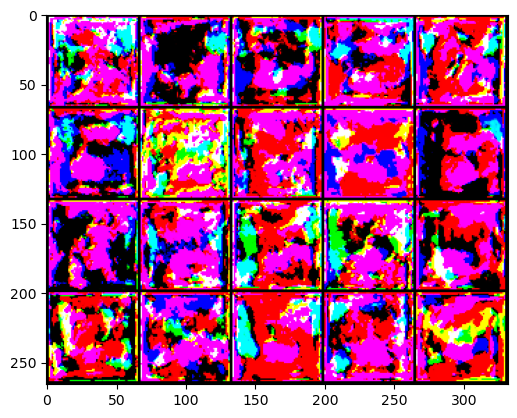

  0%|          | 39/8000 [00:47<2:37:59,  1.19s/it]

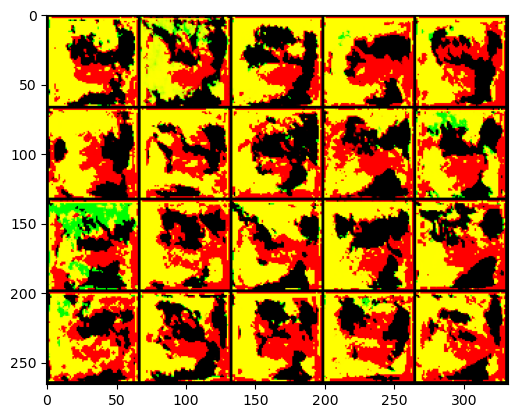

  1%|          | 59/8000 [01:11<2:37:20,  1.19s/it]

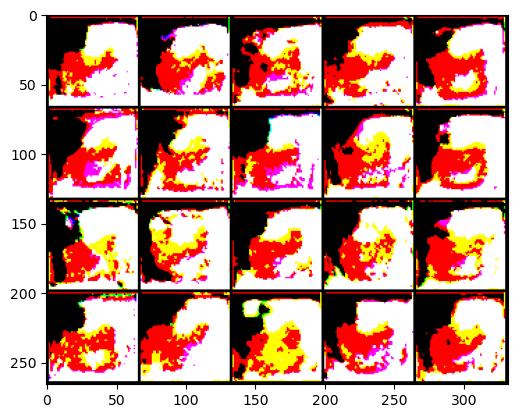

  1%|          | 79/8000 [01:35<2:35:27,  1.18s/it]

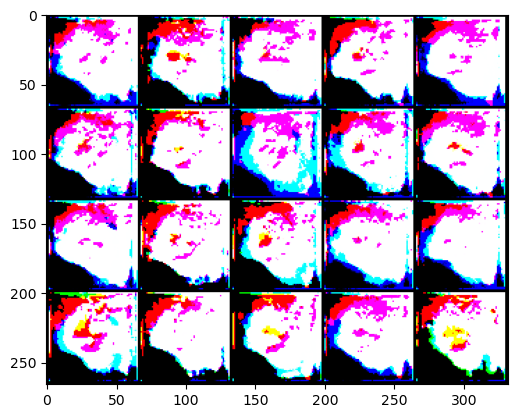

  1%|          | 99/8000 [01:58<2:34:00,  1.17s/it]

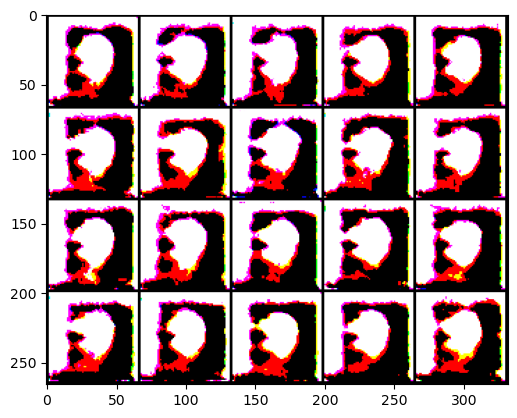

  1%|▏         | 119/8000 [02:22<2:35:14,  1.18s/it]

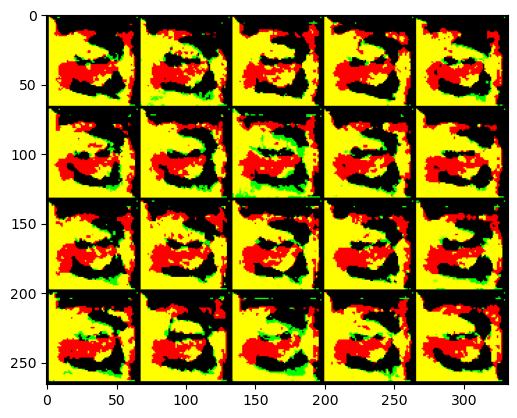

  2%|▏         | 139/8000 [02:46<2:35:11,  1.18s/it]

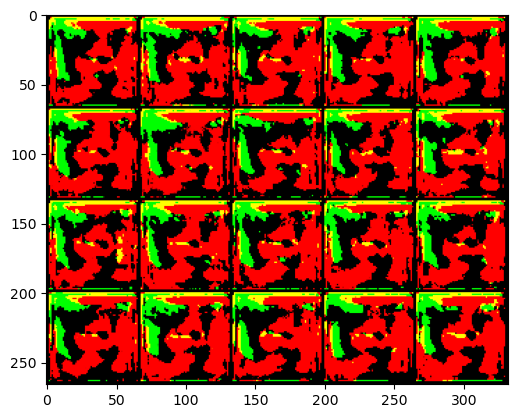

  2%|▏         | 159/8000 [03:09<2:32:56,  1.17s/it]

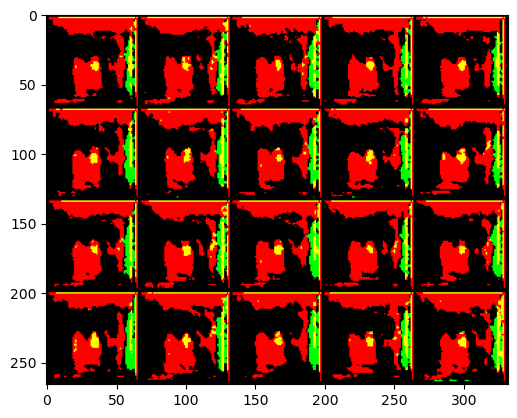

  2%|▏         | 179/8000 [03:33<2:36:58,  1.20s/it]

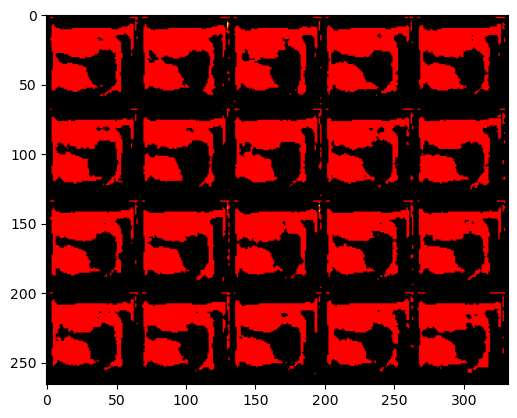

  2%|▏         | 199/8000 [03:58<2:34:50,  1.19s/it]

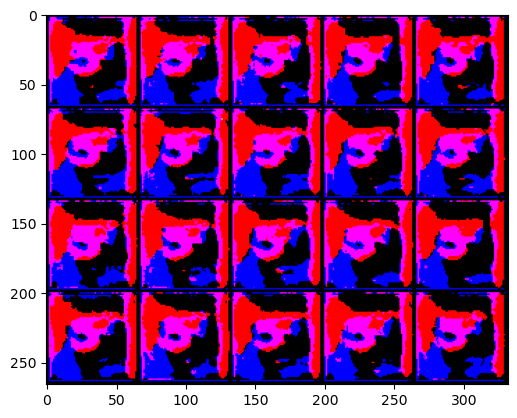

  3%|▎         | 219/8000 [04:22<2:35:12,  1.20s/it]

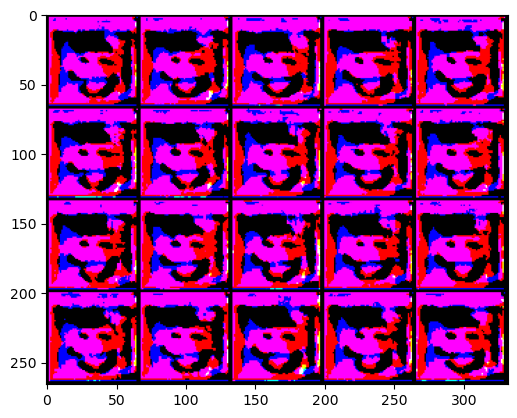

  3%|▎         | 239/8000 [04:46<2:33:39,  1.19s/it]

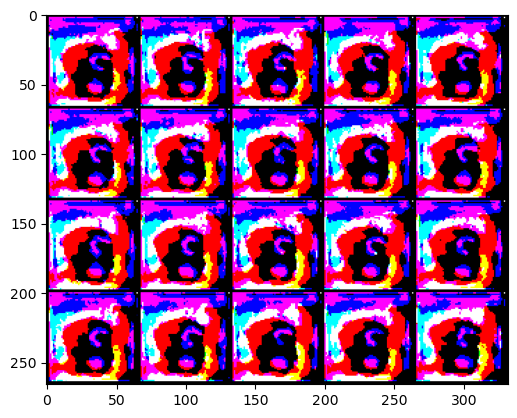

  3%|▎         | 259/8000 [05:09<2:32:51,  1.18s/it]

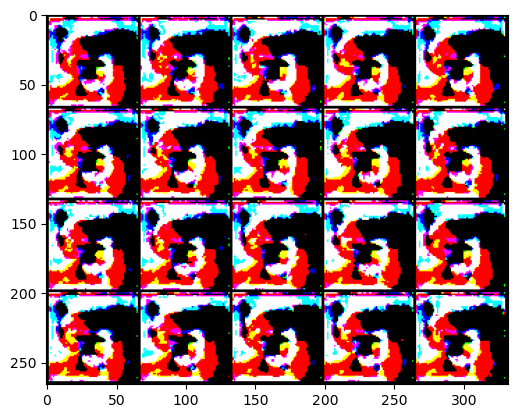

  3%|▎         | 279/8000 [05:39<2:34:45,  1.20s/it]

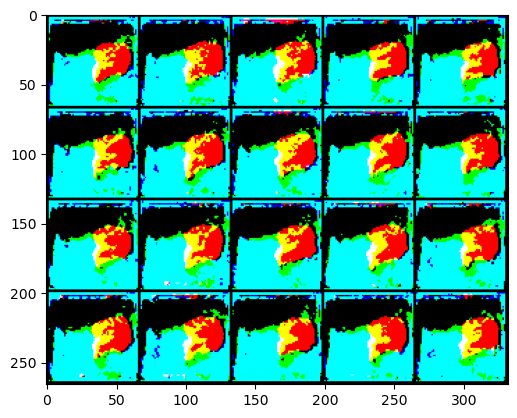

  4%|▎         | 297/8000 [06:01<2:36:11,  1.22s/it]


KeyboardInterrupt: 

In [10]:
trainer.train(
    n_steps=8000,
    regime = (3,2),
    transform=dataset.un_normalize,
    plot_every = 20,
    )

#trainer.train_with_epochs(
#        transform=dataset.un_normalize,
#        plot_every = 1
#)

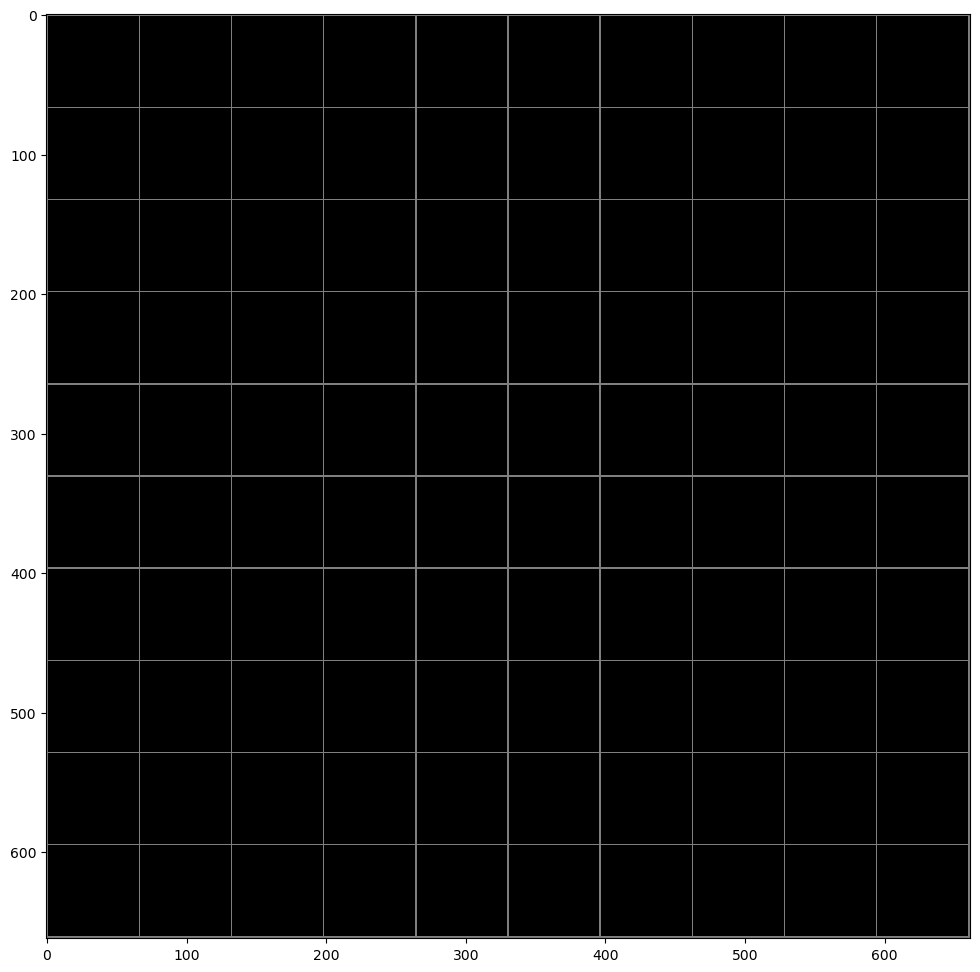

In [ ]:
generator.to("cpu")
z = torch.randn(100,latent_dim,device = "cpu")
imgs = generator(z)
imgs = dataset.un_normalize(torchvision.utils.make_grid(imgs.cpu(),nrow = 10)).permute(1,2,0)


frame,fig = plt.subplots(figsize = (12,12))
fig.imshow(imgs)